# Covid19(Korea)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [0]:
region = pd.read_csv('/content/drive/My Drive/covid/Region.csv')
timeprovince = pd.read_csv('/content/drive/My Drive/covid/TimeProvince.csv')
timegender = pd.read_csv('/content/drive/My Drive/covid/TimeGender.csv')
timeage = pd.read_csv('/content/drive/My Drive/covid/TimeAge.csv')
time = pd.read_csv('/content/drive/My Drive/covid/Time.csv')
patientinfo = pd.read_csv('/content/drive/My Drive/covid/PatientInfo.csv')
patientroute = pd.read_csv('/content/drive/My Drive/covid/PatientRoute.csv')
case = pd.read_csv('/content/drive/My Drive/covid/Case.csv')
weather = pd.read_csv('/content/drive/My Drive/covid/Weather.csv')

## Case

In [0]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,79,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,24,37.592888,127.056766
2,1000003,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
3,1000004,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403
4,1000005,Seoul,Jongno-gu,True,Jongno Community Center,10,37.57681,127.006


In [0]:
case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
case_id           81 non-null int64
province          81 non-null object
city              81 non-null object
group             81 non-null bool
infection_case    81 non-null object
confirmed         81 non-null int64
latitude          81 non-null object
longitude         81 non-null object
dtypes: bool(1), int64(2), object(5)
memory usage: 4.6+ KB


In [0]:
case.isna().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

In [32]:
case['infection_case'].value_counts()

etc                                      17
Shincheonji Church                       15
contact with patient                      8
overseas inflow                           5
Guro-gu Call Center                       3
Cheongdo Daenam Hospital                  3
Onchun Church                             2
Seosan-si Laboratory                      2
gym facility in Cheonan                   2
Jung-gu Fashion Company                   1
Suwon Saeng Myeong Saem Church            1
Bundang Jesaeng Hospital                  1
Ministry of Oceans and Fisheries          1
Jin-gu Academy                            1
gym facility in Sejong                    1
River of Grace Community Church           1
Seongdong-gu APT                          1
Geochang Church                           1
Jongno Community Center                   1
Gyeongsan Seorin Nursing Home             1
Bonghwa Pureun Nursing Home               1
Gyeongsan Cham Joeun Community Center     1
Haeundae-gu Catholic Church     

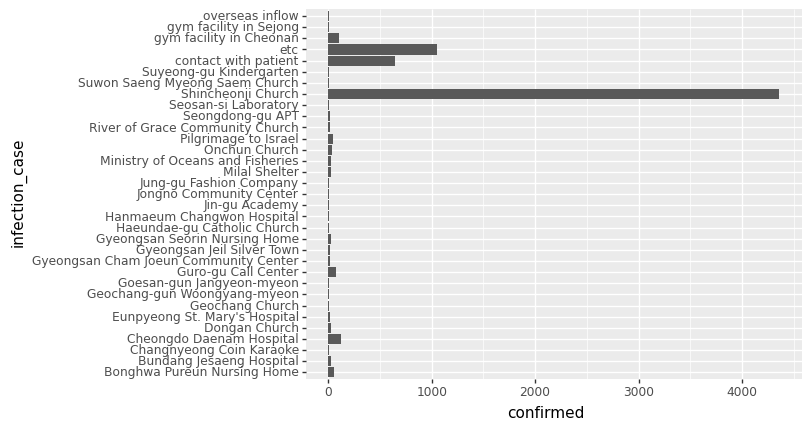

<ggplot: (-9223363244811653330)>

In [33]:
from plotnine import *

(ggplot(case)
 + aes(x = 'infection_case', y = 'confirmed')
 + geom_bar(stat = 'identity', position='dodge')
 + coord_flip()
)

# Time

In [0]:
time.head()

,date,time,test,negative,confirmed,released,deceased
0,2020-01-20,16,1,0,1,0,0
1,2020-01-21,16,1,0,1,0,0
2,2020-01-22,16,4,3,1,0,0
3,2020-01-23,16,22,21,1,0,0
4,2020-01-24,16,27,25,2,0,0


In [0]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
date         63 non-null object
time         63 non-null int64
test         63 non-null int64
negative     63 non-null int64
confirmed    63 non-null int64
released     63 non-null int64
deceased     63 non-null int64
dtypes: int64(6), object(1)
memory usage: 3.6+ KB


In [0]:
df = time.copy()
df['date'] = df['date'].str.extract('-+(\d{2}-\d{2})')

Text(0, 0.5, 'Number of test')

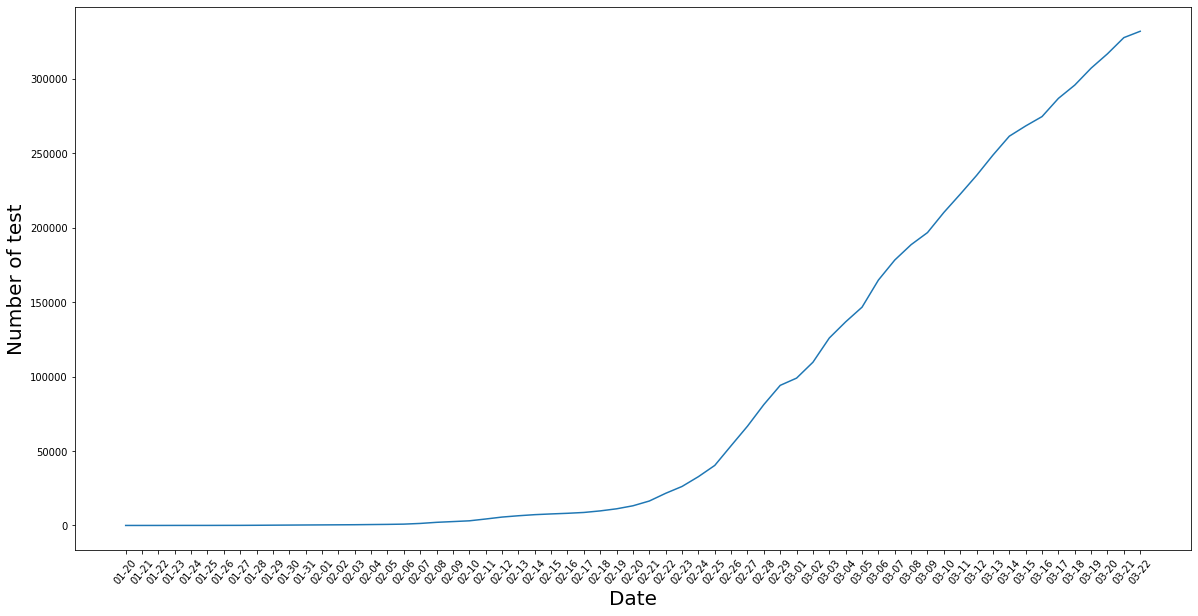

In [43]:
import seaborn as sns

plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = 'date', y = 'test')

plt.xticks(rotation = 50)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of test', fontsize = 20)

Text(0, 0.5, 'Number of negative')

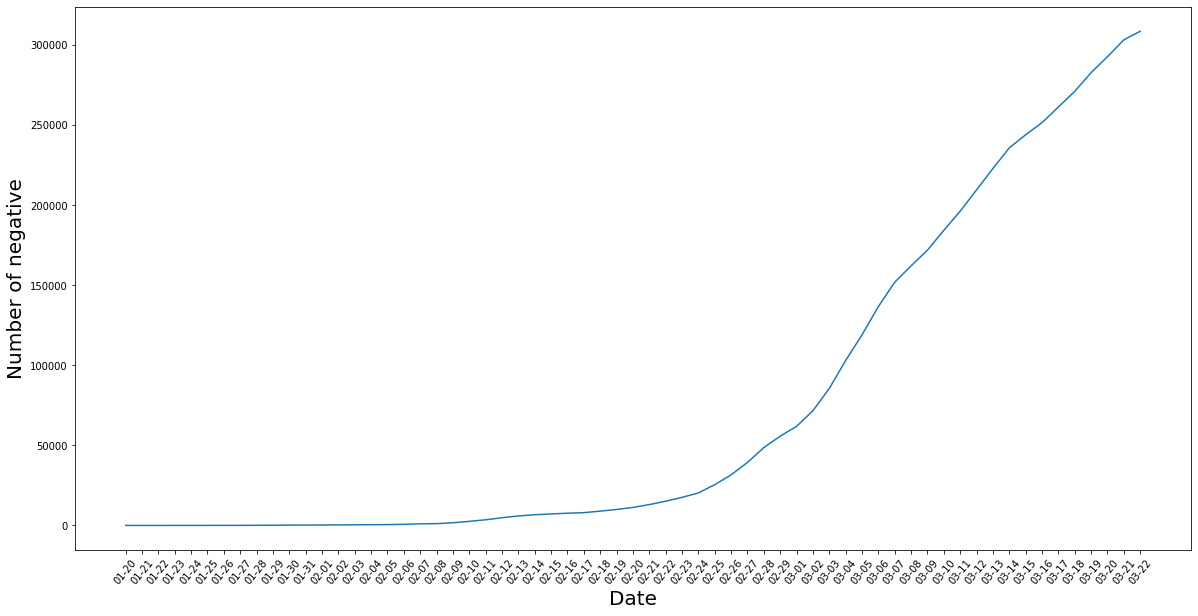

In [44]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = 'date', y = 'negative')

plt.xticks(rotation = 50)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of negative', fontsize = 20)

Text(0, 0.5, 'Number of confirmed')

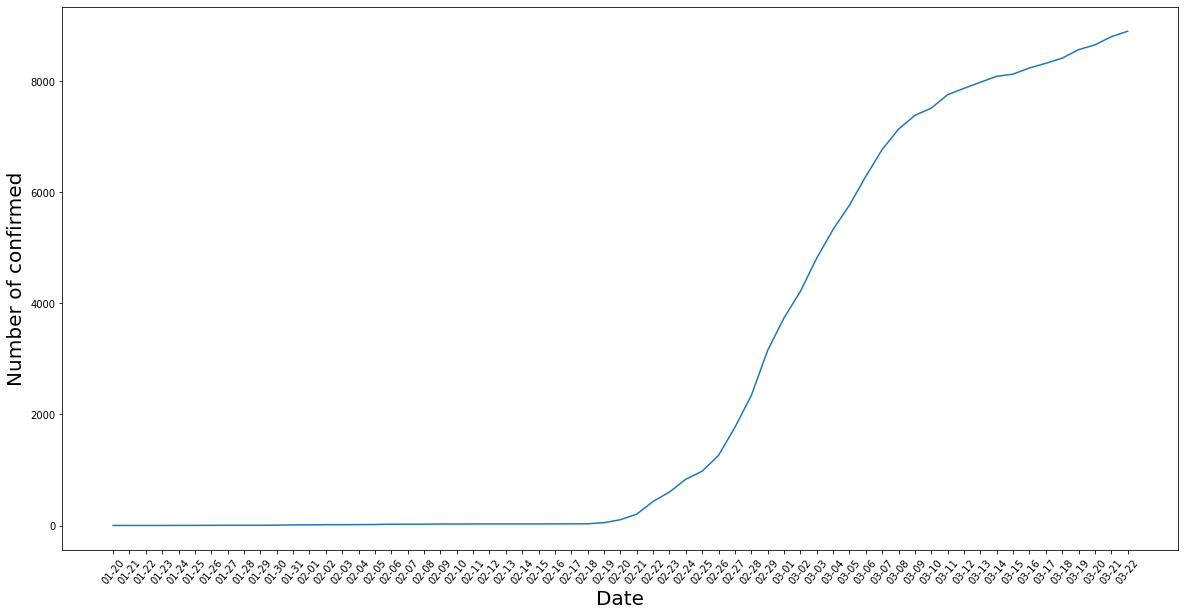

In [45]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = 'date', y = 'confirmed')

plt.xticks(rotation = 50)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of confirmed', fontsize = 20)

Text(0, 0.5, 'Number of released')

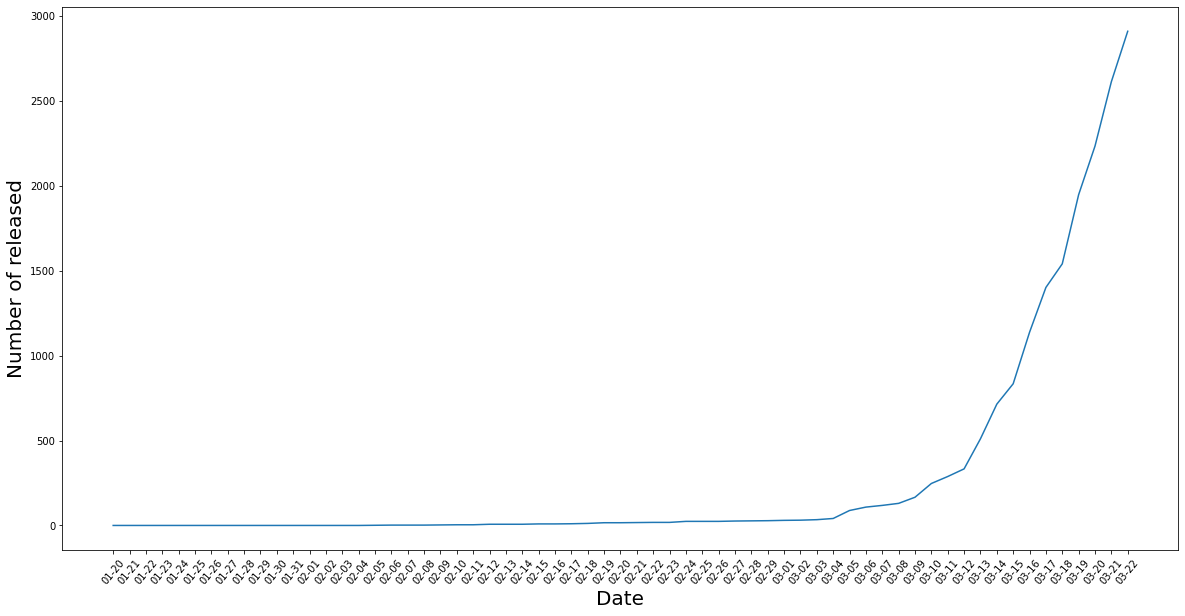

In [46]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = 'date', y = 'released')

plt.xticks(rotation = 50)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of released', fontsize = 20)

Text(0, 0.5, 'Number of deceased')

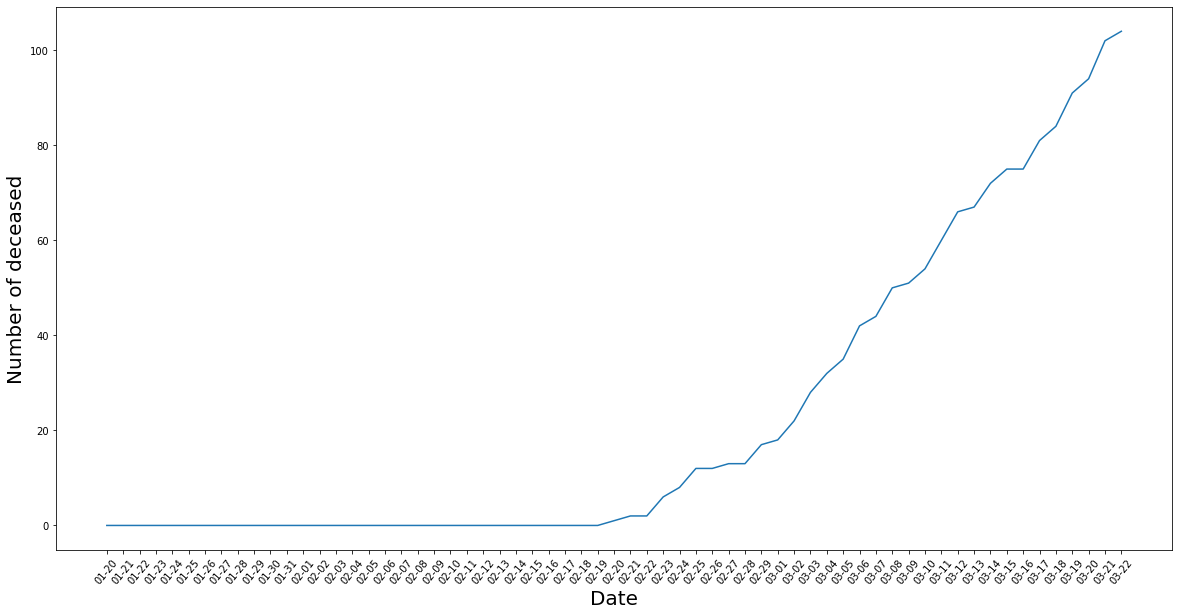

In [47]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = 'date', y = 'deceased')

plt.xticks(rotation = 50)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of deceased', fontsize = 20)

In [74]:
import pyecharts.charts as pe
from pyecharts import options as opts
from IPython.display import HTML

date = [d for d in df['date']]
test = [t for t in df['test']]
neg = [n for n in df['negative']]
con = [c for c in df['confirmed']]
rel = [r for r in df['released']]
dec = [d for d in df['deceased']]

line = pe.Line(init_opts = opts.InitOpts(width = '970px', height = '600px'))
line.set_global_opts(title_opts = opts.TitleOpts(title = 'Covid19 누적 숫자'))
line.add_xaxis(date)
line.add_yaxis('Test', test, itemstyle_opts = {'color':"#ff0000"})
line.add_yaxis('Negative', neg, itemstyle_opts = {'color':"#0046f9"})
line.add_yaxis('Confirmed', con, itemstyle_opts = {'color':"#000000"})
line.add_yaxis('Released', rel, itemstyle_opts = {'color':"#ed7855"})
line.add_yaxis('Deceased', dec, itemstyle_opts = {'color':"#f2da54"})
line.set_series_opts(label_opts = {'is_show' : True}, linestyle_opts = {'width' : 1.5}, symbol = 'circle')
HTML(line.render())

# Timeage


In [50]:
timeage.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1


In [51]:
timeage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
date         189 non-null object
time         189 non-null int64
age          189 non-null object
confirmed    189 non-null int64
deceased     189 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.5+ KB


In [0]:
timeage.isnull().sum()

date         0
time         0
age          0
confirmed    0
deceased     0
dtype: int64

In [0]:
df = timeage.copy()
df['date'] = df['date'].str.extract('-+(\d{2}-\d{2})')

In [0]:
def make_var(i):
    v1 = [c for c in df.loc[df['age'] == i, 'confirmed']]
    v2 = [d for d in df.loc[df['age'] == i, 'deceased']]
    return v1, v2

In [0]:
confirmed_0s, deceased_0s = make_var('0s')
confirmed_10s, deceased_10s = make_var('10s')
confirmed_20s, deceased_20s = make_var('20s')
confirmed_30s, deceased_30s = make_var('30s')
confirmed_40s, deceased_40s = make_var('40s')
confirmed_50s, deceased_50s = make_var('50s')
confirmed_60s, deceased_60s = make_var('60s')
confirmed_70s, deceased_70s = make_var('70s')
confirmed_80s, deceased_80s = make_var('80s')

In [0]:
from pyecharts.globals import ThemeType

def make_pyecharts(var1, var2, var3):
    line = pe.Line(init_opts = opts.InitOpts(width = '970px', height = '600px', theme = ThemeType.LIGHT))
    line.add_xaxis(var1)
    line.add_yaxis('Confirmed', var2)
    line.add_yaxis('Deceased', var3)
    line.set_series_opts(label_opts = {'is_show' : True}, linestyle_opts = {'width' : 1.5}, symbol = 'circle')

    return line

In [131]:
line0 = make_pyecharts(age_group, confirmed_0s, deceased_0s)
line1 = make_pyecharts(age_group, confirmed_10s, deceased_10s)
line2 = make_pyecharts(age_group, confirmed_20s, deceased_20s)
line3 = make_pyecharts(age_group, confirmed_30s, deceased_30s)
line4 = make_pyecharts(age_group, confirmed_40s, deceased_40s)
line5 = make_pyecharts(age_group, confirmed_50s, deceased_50s)
line6 = make_pyecharts(age_group, confirmed_60s, deceased_60s)
line7 = make_pyecharts(age_group, confirmed_70s, deceased_70s)
line8 = make_pyecharts(age_group, confirmed_80s, deceased_80s)

line0.set_global_opts(title_opts = opts.TitleOpts(title = '연령대 별 확진자 및 사망자 수', subtitle = '(명)'))

timeline = pe.Timeline(init_opts = opts.InitOpts(width = '1500px', height = '600px'))
timeline.add_schema(is_auto_play = True)
timeline.add(line0, '10대 미만'); timeline.add(line1, '10대'); timeline.add(line2, '20대')
timeline.add(line3, '30대'); timeline.add(line4, '40대'); timeline.add(line5, '50대')
timeline.add(line6, '60대'); timeline.add(line7, '70대'); timeline.add(line8, '80대')
HTML(timeline.render())

# Timeprovince


In [0]:
timeprovince.head()

In [0]:
timeprovince.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 6 columns):
date         1071 non-null object
time         1071 non-null int64
province     1071 non-null object
confirmed    1071 non-null int64
released     1071 non-null int64
deceased     1071 non-null int64
dtypes: int64(4), object(2)
memory usage: 50.3+ KB


In [0]:
timeprovince.isnull().sum()

date         0
time         0
province     0
confirmed    0
released     0
deceased     0
dtype: int64

In [0]:
df = timeprovince.copy()
df['date'] = df['date'].str.extract('-+(\d{2}-\d{2})')

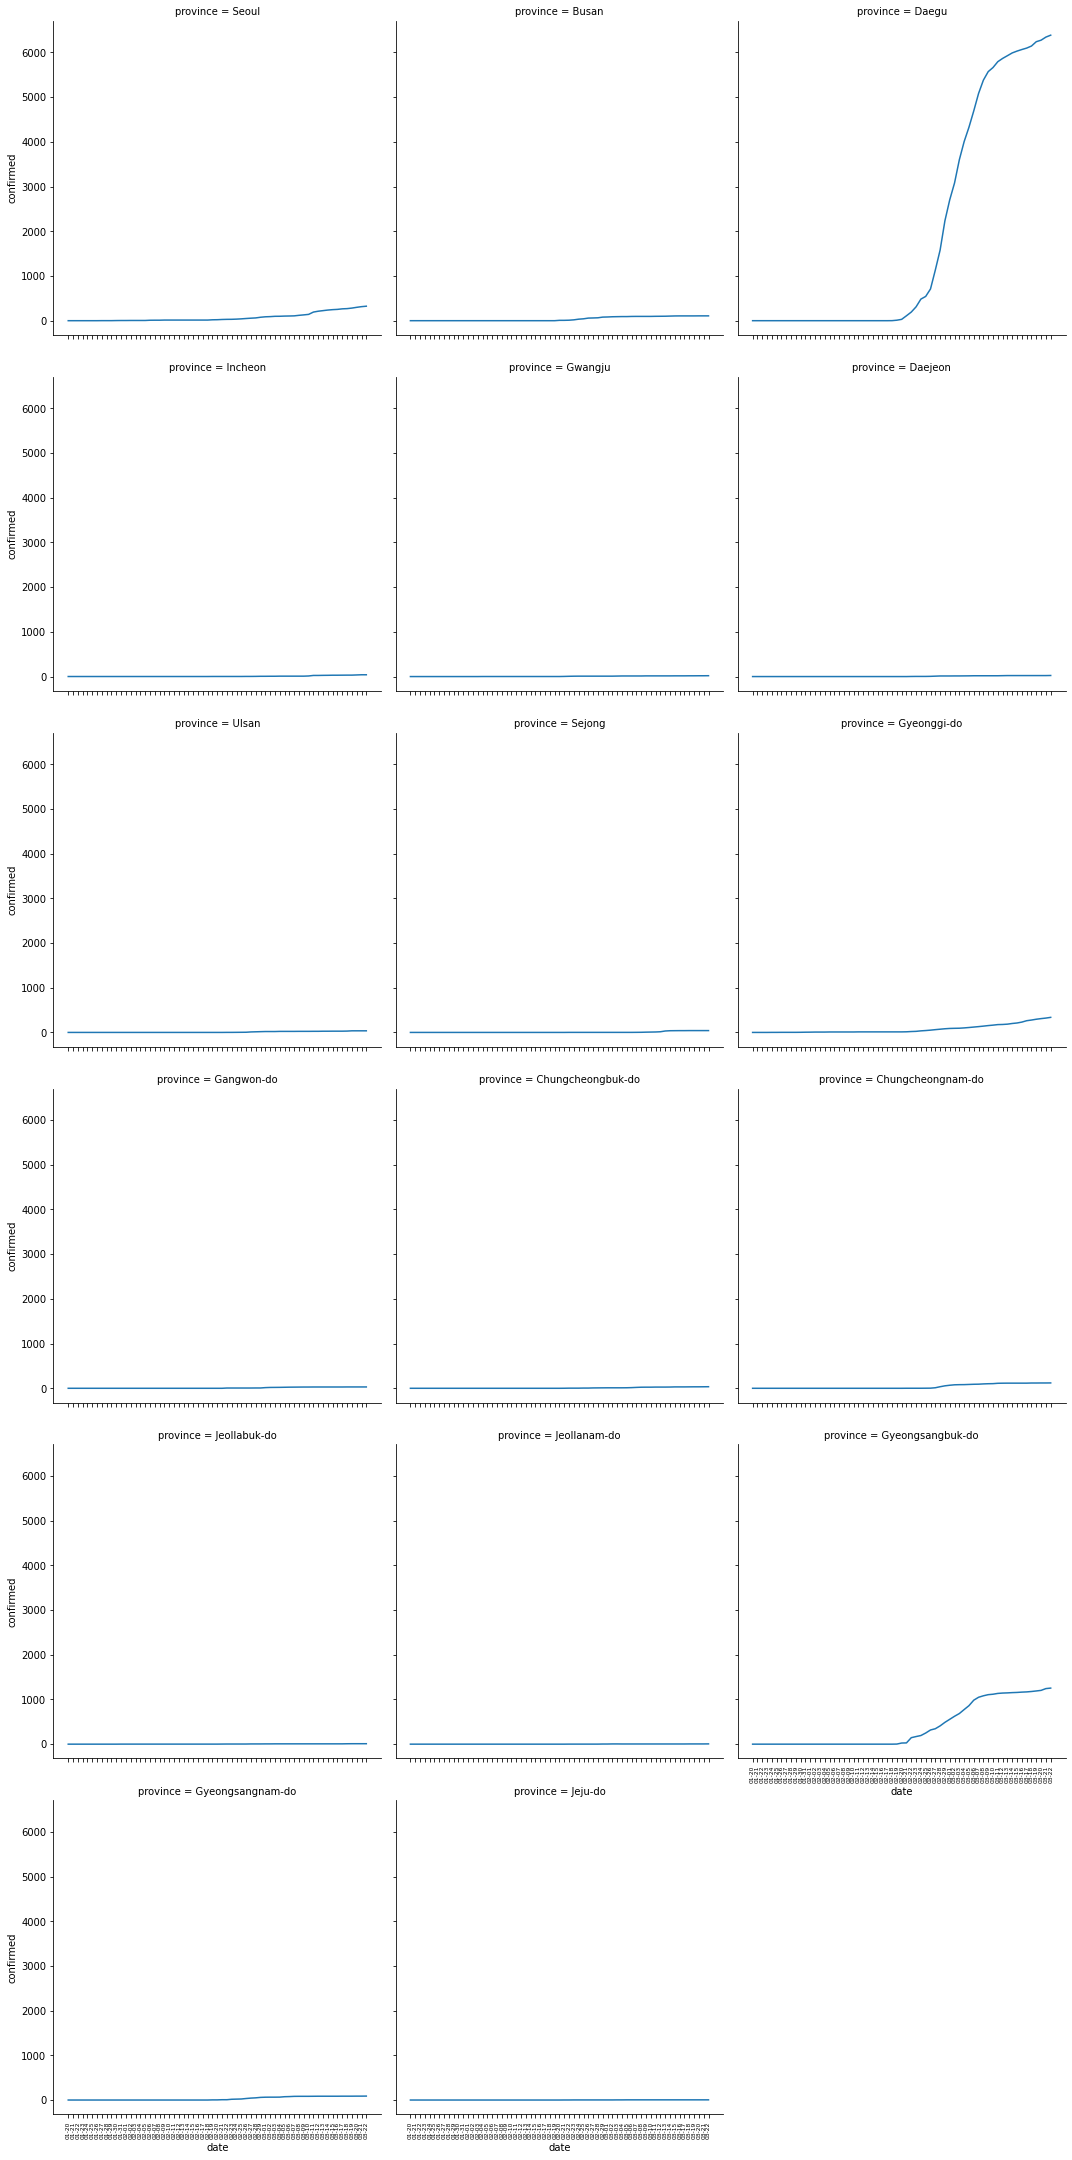

In [111]:
g = sns.relplot(data = df, x = 'date', y = 'confirmed', kind = 'line', col = 'province', col_wrap = 3)
g.set_xticklabels(rotation = 90, size = 6)

In [0]:
def values(var):
    v1 = [v for v in df.loc[df['province'] == var, 'confirmed']]
    v2 = [v for v in df.loc[df['province'] == var, 'released']]
    v3 = [v for v in df.loc[df['province'] == var, 'deceased']]

    return v1, v2, v3

In [0]:
date = [d for d in df.loc[df['province'] == 'Seoul', 'date']]

sl1, sl2, sl3 = values('Seoul')
bs1, bs2, bs3 = values('Busan')
dg1, dg2, dg3 = values('Daegu')
ic1, ic2, ic2 = values('Incheon')
gj1, gj2, gj3 = values('Gwangju')
dj1, dj2, dj3 = values('Daejeon')
us1, us2, us3 = values('Ulsan')
sj1, sj2, sj3 = values('Sejong')
gg1, gg2, gg3 = values('Gyeonggi-do')
gw1, gw2, gw3 = values('Gangwon-do')
cb1, cb2, cb3 = values('Chungcheongbuk-do')
cn1, cn2, cn3 = values('Chungcheongnam-do')
jb1, jb2, jb3 = values('Jeollabuk-do')
jn1, jn2, jn3 = values('Jeollanam-do')
gb1, gb2, gb3 = values('Gyeongsangbuk-do')
gn1, gn2, gn3 = values('Gyeongsangnam-do')
jj1, jj2, jj3 = values('Jeju-do')

In [0]:
def make_pyecharts(var1, var2, var3, var4):
    line = pe.Line(init_opts = opts.InitOpts(width = '970px', height = '600px', theme = ThemeType.LIGHT))
    line.add_xaxis(var1)
    line.add_yaxis('Confirmed', var2)
    line.add_yaxis('Released', var3)
    line.add_yaxis('Deceased', var4)
    line.set_series_opts(label_opts = {'is_show' : True}, linestyle_opts = {'width' : 1.5}, symbol = 'circle')

    return line

In [0]:
line1 = make_pyecharts(date, sl1, sl2, sl3)
line2 = make_pyecharts(date, bs1, bs2, bs3)
line3 = make_pyecharts(date, dg1, dg2, dg3)
line4 = make_pyecharts(date, ic1, ic2, ic2)
line5 = make_pyecharts(date, gj1, gj2, gj3)
line6 = make_pyecharts(date, dj1, dj2, dj3)
line7 = make_pyecharts(date, us1, us2, us3)
line8 = make_pyecharts(date, sj1, sj2, sj3)
line9 = make_pyecharts(date, gg1, gg2, gg3)
line10 = make_pyecharts(date, gw1, gw2, gw3)
line11 = make_pyecharts(date, cb1, cb2, cb3)
line12 = make_pyecharts(date, cn1, cn2, cn3)
line13 = make_pyecharts(date, jb1, jb2, jb3)
line14 = make_pyecharts(date, jn1, jn2, jn3 )
line15 = make_pyecharts(date, gb1, gb2, gb3)
line16 = make_pyecharts(date, gn1, gn2, gn3)
line17 = make_pyecharts(date, jj1, jj2, jj3)

In [160]:
line1.set_global_opts(title_opts = opts.TitleOpts(title = '지역 별 확진/완치/사망자 수', subtitle = '(명)'))

timeline = pe.Timeline(init_opts = opts.InitOpts(width = '1500px', height = '600px'))
timeline.add_schema(is_auto_play = False, )
timeline.add(line1, '서울'); timeline.add(line2, '부산'); timeline.add(line3, '대구')
timeline.add(line4, '인천'); timeline.add(line5, '광주'); timeline.add(line6, '대전')
timeline.add(line7, '울산'); timeline.add(line8, '세종'); timeline.add(line9, '경기도')
timeline.add(line10, '강원도'); timeline.add(line11, '충청북도'); timeline.add(line12, '충청남도')
timeline.add(line13, '전라북도'); timeline.add(line14, '전라남도'); timeline.add(line15, '경상북도')
timeline.add(line16, '경상남도'); timeline.add(line17, '제주도');
HTML(timeline.render())

# Timegender

In [0]:
timegender.head()

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [0]:
timegender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
date         42 non-null object
time         42 non-null int64
sex          42 non-null object
confirmed    42 non-null int64
deceased     42 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.8+ KB


In [0]:
df = timegender.copy()
df['date'] = df['date'].str.extract('-+(\d{2}-\d{2})')

Text(0, 0.5, 'Number of Confirmed')

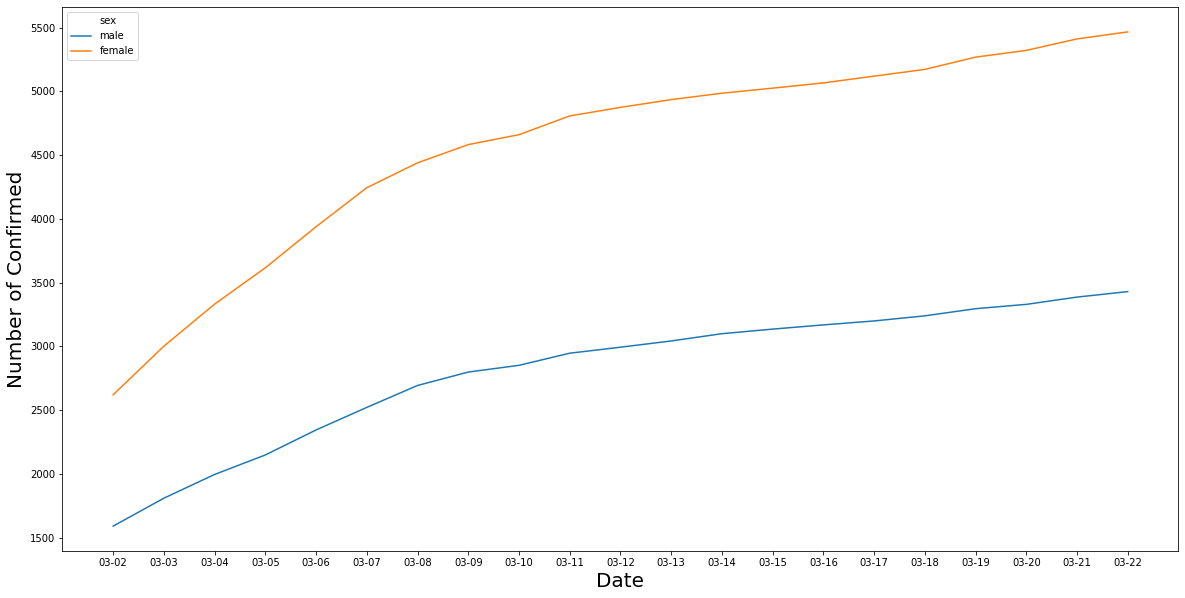

In [121]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = 'date', y = 'confirmed', hue = 'sex')

plt.xticks(size = 10)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Confirmed', fontsize = 20)

<Figure size 1440x720 with 0 Axes>

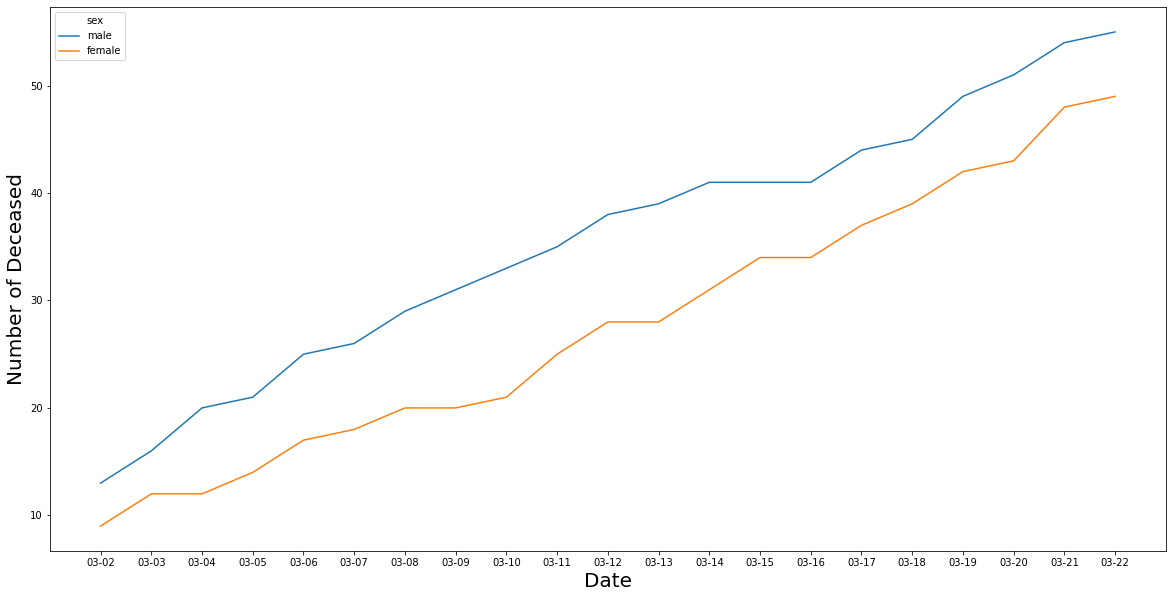

<Figure size 1440x720 with 0 Axes>

In [122]:
plt.figure(figsize = (20, 10))
sns.lineplot(data = df, x = 'date', y = 'deceased', hue = 'sex')

plt.xticks(size = 10)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Deceased', fontsize = 20)
plt.figure(figsize = (20,10))

In [0]:
date = [d for d in df.loc[df['sex'] == 'male','date']]
confirmed_male = [c for c in df.loc[df['sex'] == 'male', 'confirmed']] 
deceased_male = [d for d in df.loc[df['sex'] == 'male', 'deceased']]

confirmed_female = [c for c in df.loc[df['sex'] == 'female', 'confirmed']]
deceased_female = [d for d in df.loc[df['sex'] == 'female', 'deceased']]

In [142]:
line0 = make_pyecharts(date, confirmed_male, deceased_male)
line1 = make_pyecharts(date, confirmed_female, deceased_female)

line0.set_global_opts(title_opts = opts.TitleOpts(title = '성별 별 확진자 및 사망자 수', subtitle = '(명)'))

timeline = pe.Timeline(init_opts = opts.InitOpts(width = '970px', height = '600px'))
timeline.add(line0, '남성'); timeline.add(line1, '여성')
HTML(timeline.render())

## Reference
- [Covi19_데이터시각화](https://dacon.io/competitions/official/235590/codeshare/802)